In [ ]:
%matplotlib inline

# Prototype

## Introduction

I will import first the libraries I believe I will be using, I will start with these and add more as I progress.

I plan to start doing a **Decision Tree Classifier** and a **Random Forest Classifier**. 

For the prototype I will only focus on one:

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Import to split training and test data
from sklearn.model_selection import train_test_split

# Import the data
There are three files I have for usage. 

*   The first, used here, is the training data file which has users with several features describing them, and a risk flag (which is either 1 (person defaulted) or 0 (person did not default)) which says whether the individual has defaulted in the past.

*   The second is the test data dataset, which includes new id's and their features but no risk default, with this data set I will predict possible defaulting individuals.



In [ ]:
#ASK QUESTIONS FOR THIS ONE:
df = pd.read_csv("Training Data.csv", index_col = 0, 
                 dtype={'Income': int, 'Age': int,
                        'Experience': int, 'Married/Single': 'category',
                        'House_Ownership': 'category', 'Car_Ownership': 'category',
                        'Profession': 'category', 'CITY': 'category',
                        'STATE': 'category', 'CURRENT_JOB_YRS': int,
                        'CURRENT_JOB_YRS': int, 'CURRENT_HOUSE_YRS': int,
                        'Risk_Flag': int	
                        },
                 na_values = ['n/a', ' ', '', '-']
                 )
print('the set has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

df

the set has 252000 rows and 12 columns


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0


The Marriage/Single column is bothersome so I will change it

In [ ]:
df = df.rename(columns = {'Married/Single':'relationship_status'})

I am manually typing the variable data types as six of them are otherwise objects.

I am also creating some new missing values to avoid missing any when I search for them below.




#Describe Numericals

Using the describe() method, I can see some important details including:    

*  The risk flag mean is 0.12, meaning that **most individuals are defaulters**. Standard deviation is 0.32 however

* Income mean is quite high, and the max is so as well, but the min is extremely low (10310 Indian Rupees are 140 USD approximately) 

* Age is appropriately dispersed

* The **categorical and string variables are not displayed** (Marriage, house and car ownership,  proffesion, city and state), I will explore them with other methods  later



In [ ]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


#Describe Categoricals

Here I can describe the categorical variables.

Some important thigns to remember:     
* **top** is the most common value

* **freq** is the frequency of the most common value

* There are 51 different professions displayed, 317 different cities, 29 states

* I can use *df.describe(include='all')* to display all columns including numerical and categorical data types

In [ ]:
categorical_info = df[['relationship_status','House_Ownership', 'Car_Ownership',
                        'Profession', 'CITY', 'STATE']].describe()

categorical_info

,relationship_status,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


Check which variables are numerical and categorical, they are all numerical

**(Check if this is correct)** because shouldnt strings and categoricals be categorical? 

In [ ]:
numerical_variables = df.columns[df.dtypes != 'object']
categorical_variables = df.columns[df.dtypes == 'object']

print(numerical_variables)
print(categorical_variables)

Index(['Income', 'Age', 'Experience', 'relationship_status', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')
Index([], dtype='object')


#Missing Values
Check out missing values, seem to be no NA fields not fields with missing values (isnull), 

* *Use the sort_values() function to sort columns in descending order, like this df.isna().sum().sort_values()*

* *Divide this by len(df) to get the percentage of missing values like this df.isna().sum().sort_values()/len(df)*

In [ ]:
na_values = df.isna().sum()

na_values

Income                 0
Age                    0
Experience             0
relationship_status    0
House_Ownership        0
Car_Ownership          0
Profession             0
CITY                   0
STATE                  0
CURRENT_JOB_YRS        0
CURRENT_HOUSE_YRS      0
Risk_Flag              0
dtype: int64

#Correlation

I will start using the **corr()** method with the '**pearson**' method until I find out which methods are better (kendall maybe).

* The pearson method measures the strenght of the linear relationship between two variables, it goes from -1 to 1, -1 means negative linera correlation, 0 means there is no correlation, 1 means there is a total positive correlation (*Nettleton, D. (2014). Selection of Variables and Factor Derivation. In Commercial Data Mining Processing, analysis and modeling for Predictive Analytics Projects. essay, Elsevier. *)

* If I read categorical variables as explict categories I can use corr() to find the correlation with them and Risk_Flag

[4].



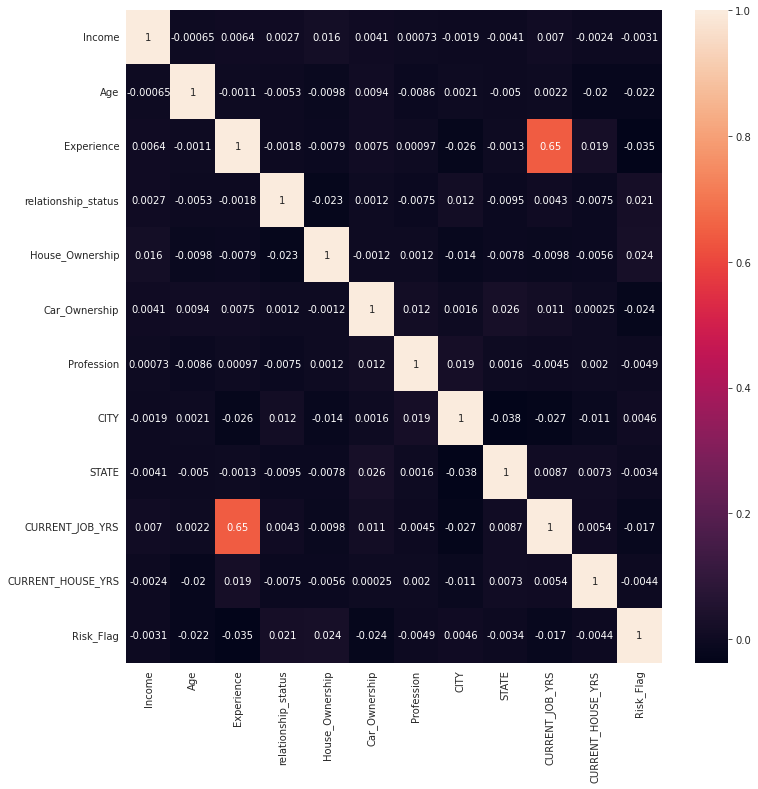

In [ ]:
df = pd.DataFrame(df)

plt.figure(figsize=(12,12))


corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()



I can also see it easier using the print method

The negative correlated values are:      
* Age (**low correlation**)
* Years of Experience (** low correlation**)
* Current Car Ownership (**low correlation**)
* Current Job Years (**low correlation**)
* Income (**very low correlation**)
* Current House Years (**very low correlation**)
* State (**very low correlation**)
* Current Profession (**very low correlation**)



The positive correlated values are:      
* Current Relationship Status (**low correlation**)
* Current House Ownership (**low correlation**)
* City (**very low correlation**)


In [ ]:
print('The correlation between Income and Risk Flag is:', df['Income'].corr(df['Risk_Flag']))
print('The correlation between Age and Risk Flag is:', df['Age'].corr(df['Risk_Flag']))
print('The correlation between years of experience and Risk Flag is:', df['Experience'].corr(df['Risk_Flag']))
print('The correlation between Current Relationship Status and Risk Flag is:', df['relationship_status'].corr(df['Risk_Flag']))
print('The correlation between Current House Ownership and Risk Flag is:', df['House_Ownership'].corr(df['Risk_Flag']))
print('The correlation between Current Car Ownership and Risk Flag is:', df['Car_Ownership'].corr(df['Risk_Flag']))
print('The correlation between Current Profession and Risk Flag is:', df['Profession'].corr(df['Risk_Flag']))
print('The correlation between City and Risk Flag is:', df['CITY'].corr(df['Risk_Flag']))
print('The correlation between State and Risk Flag is:', df['STATE'].corr(df['Risk_Flag']))
print('The correlation between Current Job Years and Risk Flag is:', df['CURRENT_JOB_YRS'].corr(df['Risk_Flag']))
print('The correlation between Current House Years and Risk Flag is:', df['CURRENT_HOUSE_YRS'].corr(df['Risk_Flag']))


The correlation between Income and Risk Flag is: -0.0030911681222720554
The correlation between Age and Risk Flag is: -0.021809276050707163
The correlation between years of experience and Risk Flag is: -0.0345226128907168
The correlation between Current Relationship Status and Risk Flag is: 0.02109164113471852
The correlation between Current House Ownership and Risk Flag is: 0.023622409567492945
The correlation between Current Car Ownership and Risk Flag is: -0.024035618108751426
The correlation between Current Profession and Risk Flag is: -0.004899844722877818
The correlation between City and Risk Flag is: 0.004575004615335424
The correlation between State and Risk Flag is: -0.0034011359121213624
The correlation between Current Job Years and Risk Flag is: -0.016941582052124864
The correlation between Current House Years and Risk Flag is: -0.004375163077673377


## Data Analysis

I will make some seaborn plots to visualize the relationship between Default Risk_Flag and  4 other variables: 

* House_Ownership, Married/Single, Car_Ownership and CURRENT_HOUSE_YRS

[1]. 

[2].

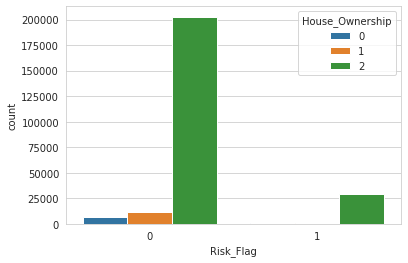

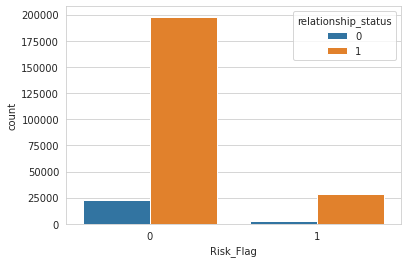

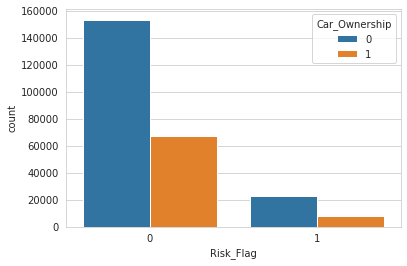

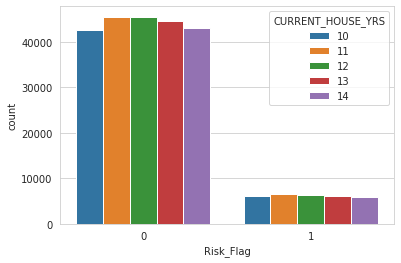

In [ ]:
sns.countplot(x='Risk_Flag' , data = df , hue = 'House_Ownership')
plt.show()

sns.countplot(x='Risk_Flag' ,data = df , hue = 'relationship_status')
plt.show()

sns.countplot(x='Risk_Flag' ,data = df , hue = 'Car_Ownership')
plt.show()

sns.countplot(x='Risk_Flag' ,data = df , hue = 'CURRENT_HOUSE_YRS')
plt.show()

Now I must **encode** the values that I previously strongly typed as categories, so their values are more easily read by the algorithms I will be implementing

[3].

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_columns = [df.relationship_status,df.House_Ownership,df.Car_Ownership,df.Profession,df.STATE,df.CITY]
for i in df_columns:
    i = le.fit_transform(i)

Now each variable of the categorical variables are integers instead of words.

In [ ]:
df.relationship_status = le.fit_transform(df.relationship_status)
df.House_Ownership = le.fit_transform(df.House_Ownership)
df.Car_Ownership = le.fit_transform(df.Car_Ownership)
df.Profession = le.fit_transform(df.Profession)
df.STATE = le.fit_transform(df.STATE)
df.CITY = le.fit_transform(df.CITY)

df

,Income,Age,Experience,relationship_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,1,2,0,33,251,13,3,13,0
2,7574516,40,10,1,2,0,43,227,14,9,13,0
3,3991815,66,4,0,2,0,47,8,12,4,10,0
4,6256451,41,2,1,2,1,43,54,17,2,12,1
5,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,1,2,0,45,162,28,6,11,0
251997,2843572,26,10,1,2,0,3,251,13,6,11,0
251998,4522448,46,7,1,2,0,17,144,14,7,12,0


# Training and Testing Samples

Now that I am done with the data preprocessing, I must split the data before I start doing the decision tree classifier.

This will help to prevent **ovefitting and underfitting** from happening.

**X** will be the dataset without the Risk_Flag column, and **y** will be the Risk_Flag column

[5].

In [69]:
X = df.drop(['Risk_Flag'], axis = 'columns')
y = df.Risk_Flag

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(168840, 11) (83160, 11) (168840,) (83160,)


# Rescale the data

StandardScaler is used for transforming data so it has 0 as mean (μ = 0) and 1 as std (σ = 1). This is ideal when we have negative values in our dataframe.

[6].

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(scaler.mean_)
print(X_train)
print(X_test)

[ 1.01842775e-17 -1.23726347e-17 -1.40559864e-17  4.54504948e-18
 -1.43926567e-17  9.80552342e-17  1.50870393e-17  1.93585441e-17
 -8.45884209e-18 -1.17834616e-17  1.74226897e-17]
[[-1.56970566e-01 -1.46195964e+00  6.52193965e-01 ...  4.46480190e-01
   7.27907042e-01 -7.13586152e-01]
 [-6.56828644e-01  1.69891125e+00  3.18838646e-01 ...  1.19277866e+00
  -3.68529312e-01  1.43116099e+00]
 [ 8.86210604e-01 -9.93682474e-01  1.15222694e+00 ...  1.19277866e+00
  -6.42638400e-01  1.32956370e-03]
 ...
 [ 7.73850748e-01 -4.66870659e-01 -1.51461561e+00 ... -1.36595896e+00
  -1.46496567e+00  7.16245279e-01]
 [ 1.43728225e+00  1.58184195e+00  8.18871625e-01 ... -2.99818282e-01
  -9.44202232e-02  7.16245279e-01]
 [ 1.43418172e+00  1.28916872e+00  4.85516306e-01 ... -8.32888620e-01
   1.82434340e+00 -1.42850187e+00]]
[[-1.30159347e+00 -3.49801367e-01  9.85549284e-01 ...  6.59708325e-01
   4.53797954e-01 -7.13586152e-01]
 [-5.41227735e-01 -2.32732075e-01 -6.81227310e-01 ... -8.65901472e-02
  -9.4420

# Decision Tree Implementation
Now I will implement the **Decision Tree Classifier**.

As seen in the scikit-learn documentation (referenced below), it takes 2 arrays as inputs (**training and test sample**)

The code below will fit the model

[7].

In [87]:
from sklearn import tree

DTreeClf = tree.DecisionTreeClassifier()
DTreeClf = DTreeClf.fit(X, y)

Following the example code from the documentation, I can plot the already trained tree:

[7].

[Text(418.5, 747.4499999999999, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(354.11538461538464, 611.55, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(482.8846153846154, 611.55, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(257.53846153846155, 475.65, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(128.76923076923077, 339.74999999999994, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(64.38461538461539, 203.8499999999999, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(193.15384615384616, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 339.74999999999994, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 203.8499999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 203.8499999999999, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(386.30769230

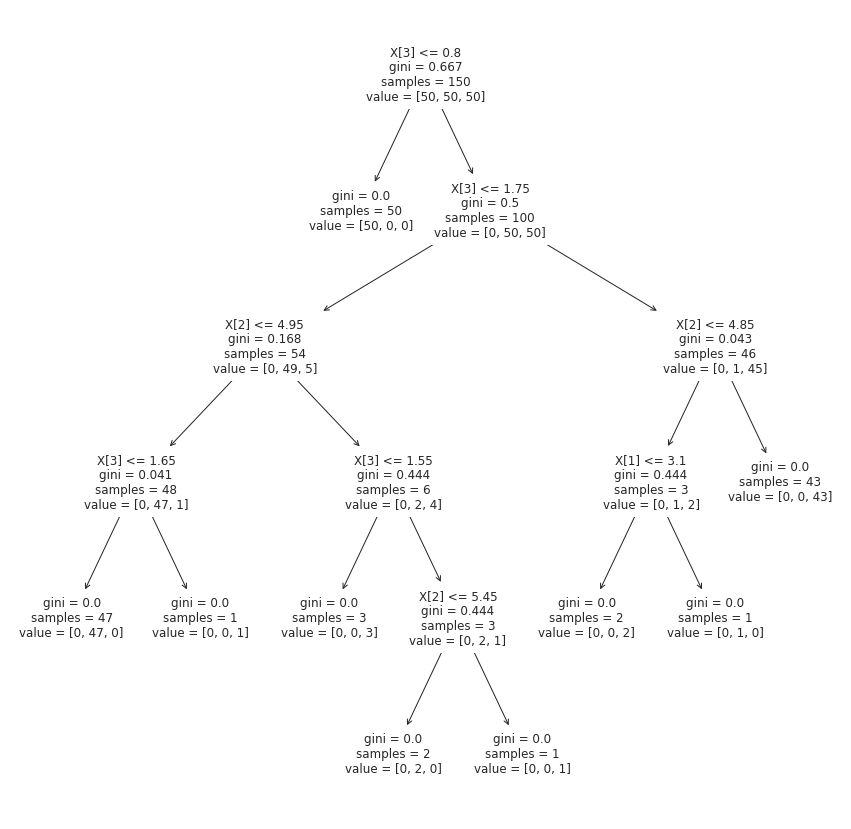

In [95]:
from sklearn import tree

plt.figure(figsize=(15,15))


tree.plot_tree(DTreeClf)

# Explaining the Decision Tree

* There are two types of nodes:     
  * One has a condition, which splits the data and makes the tree
  * The other helps us define the class of anew data point

Nodes make sub-leaves when the condition is met, and I can see that the samples are divided depending on the condition.

**How can we use a decision tree to classify a new data point however**?

It helps define the splitting conditions, like a bunch of if statements.

[8].

[9].


# Next Steps

* See how I can change hyperparameters in the Decision Tree

* Begin Random Forest Classifier

* See if there are outliers

* Consult with Dr. Buchan what the percentages should be regarding the training and test set (currently 0.33 and 0.67, unsure if there are better percentages)

* Try to understand the maths behind scaling

* Build the Neural Network and compare the models

#References 


[1]. *Make more than one chart in same ipython Notebook cell*. Stack Overflow. Retrieved from https://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell


[2]. Seaborn.countplot¶. seaborn.countplot - seaborn 0.11.2 documentation. (n.d.). Retrieved from https://seaborn.pydata.org/generated/seaborn.countplot.html. 


[3]. Sklearn.preprocessing.LabelEncoder. scikit. (n.d.). Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. 


[4].How to Create a Correlation Matrix using Pandas. Data to Fish. (2020, March 27). Retrieved from https://datatofish.com/correlation-matrix-pandas/. 


[5]. Brownlee, J. (2020, August 26). Train-test split for Evaluating Machine Learning Algorithms. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/. 


[6]. Brownlee, J. (2020, August 27). How to use StandardScaler and MinMaxScaler transforms in Python. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/. 


[7]. 1.10.1. Classification. scikit. (n.d.). Retrieved from https://scikit-learn.org/stable/modules/tree.html#classification. 


[8]. Understanding the decision tree structure. scikit. (n.d.). Retrieved November 26, 2021, from https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py. 


[9]. Normalized Nerd. (2021, January 13). Decision tree classification clearly explained! YouTube. Retrieved November 26, 2021, from https://www.youtube.com/watch?v=ZVR2Way4nwQ. 